In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading the Images

In [2]:
img_1_orig = cv2.imread("1.jpg")
img_2_orig = cv2.imread("2.jpg")
img_3_orig = cv2.imread("3.jpg")

In [3]:
img_1 = img_1_orig[:, :, [2, 1, 0]] 
img_2 = img_2_orig[:, :, [2, 1, 0]] 
img_3 = img_3_orig[:, :, [2, 1, 0]] 

# Estimating distance corresponding to one pixel

## Estimating pixel coordinates corresponding to north Antsiranana (A), south Benonoka (B), capital city Antananarivo (C), Reunion (R) and Mauritius (M)

First, rough pixel boundary of 10x10 pixels is eyeballed, following which image arrays are thresholded to (max-5), the average of the coordinates are taken to be the final coordinates

In [4]:
def estimate_center(x_rough, y_rough, img, c):

  img_estimate = img[y_rough:y_rough+10, x_rough:x_rough+10, c] #just green part of the image
  threshold = np.max(img_estimate) - 5
  estimate_coords = np.argwhere(img_estimate> threshold)

  x = x_rough + np.mean(estimate_coords[:,1])
  y = y_rough + np.mean(estimate_coords[:,0])

  return x, y

In [5]:
A_x, A_y = estimate_center(196, 263, img_1, 1)
B_x, B_y = estimate_center(90, 613, img_1, 1)
C_x, C_y = estimate_center(135, 432, img_1, 1)

R_x, R_y = estimate_center(358, 494, img_1, 2)
M_x, M_y = estimate_center(411, 471, img_1, 2)

In [6]:
print(A_x, A_y)
print(B_x, B_y)
print(C_x, C_y)
print(R_x, R_y)
print(M_x, M_y)

200.71428571428572 267.57142857142856
94.5 617.5
139.5 436.5
362.2857142857143 498.7142857142857
415.5 475.5


## Distance corresponding to one pixel

In [7]:
p_1 = np.sqrt((A_x - B_x)**2 + (A_y-B_y)**2)
pixel_d_1 = 1500/p_1

p_2 = np.sqrt((M_x - R_x)**2 + (M_y-R_y)**2)
pixel_d_2 = 250/p_2

pixel_d = (pixel_d_1+pixel_d_2)/2

In [8]:
print("Distance corresponding to one pixel in km: ", pixel_d)

Distance corresponding to one pixel in km:  4.20394092377861


# Finding the Apojuncture

## Finding coordinates for the cyclone centers Belna (B) and Ambali (A) for the three timestamps

In [9]:
coord_A = np.zeros((3, 2))
coord_B = np.zeros((3, 2))

In [10]:
coord_B[0, 0], coord_B[0, 1] = estimate_center(234, 109, img_1, 0)
coord_A[0, 0], coord_A[0, 1] = estimate_center(542, 176, img_1, 0)

coord_B[1, 0], coord_B[1, 1] = estimate_center(219, 117, img_2, 0)
coord_A[1, 0], coord_A[1, 1] = estimate_center(535, 184, img_2, 0)

coord_B[2, 0], coord_B[2, 1] = estimate_center(212, 129, img_3, 0)
coord_A[2, 0], coord_A[2, 1] = estimate_center(524, 191, img_3, 0)

In [11]:
time = np.array([0, 41, 96])

## Estimating the coordinates of the apojuncture

In [15]:
img_plot = np.copy(img_1)

In [16]:
img_plot[int(coord_A[1, 1])-1 : int(coord_A[1, 1])+1, int(coord_A[1, 0])-5 : int(coord_A[1, 0])+5, :] = [255, 0, 0]
img_plot[int(coord_A[1, 1])-5 : int(coord_A[1, 1])+5, int(coord_A[1, 0])-1 : int(coord_A[1, 0])+1, :] = [255, 0, 0]

img_plot[int(coord_A[2, 1])-1 : int(coord_A[2, 1])+1, int(coord_A[2, 0])-5 : int(coord_A[2, 0])+5, :] = [255, 0, 0]
img_plot[int(coord_A[2, 1])-5 : int(coord_A[2, 1])+5, int(coord_A[2, 0])-1 : int(coord_A[2, 0])+1, :] = [255, 0, 0]

img_plot[int(coord_B[1, 1])-1 : int(coord_B[1, 1])+1, int(coord_B[1, 0])-5 : int(coord_B[1, 0])+5, :] = [255, 0, 0]
img_plot[int(coord_B[1, 1])-5 : int(coord_B[1, 1])+5, int(coord_B[1, 0])-1 : int(coord_B[1, 0])+1, :] = [255, 0, 0]

img_plot[int(coord_B[2, 1])-1 : int(coord_B[2, 1])+1, int(coord_B[2, 0])-5 : int(coord_B[2, 0])+5, :] = [255, 0, 0]
img_plot[int(coord_B[2, 1])-5 : int(coord_B[2, 1])+5, int(coord_B[2, 0])-1 : int(coord_B[2, 0])+1, :] = [255, 0, 0]

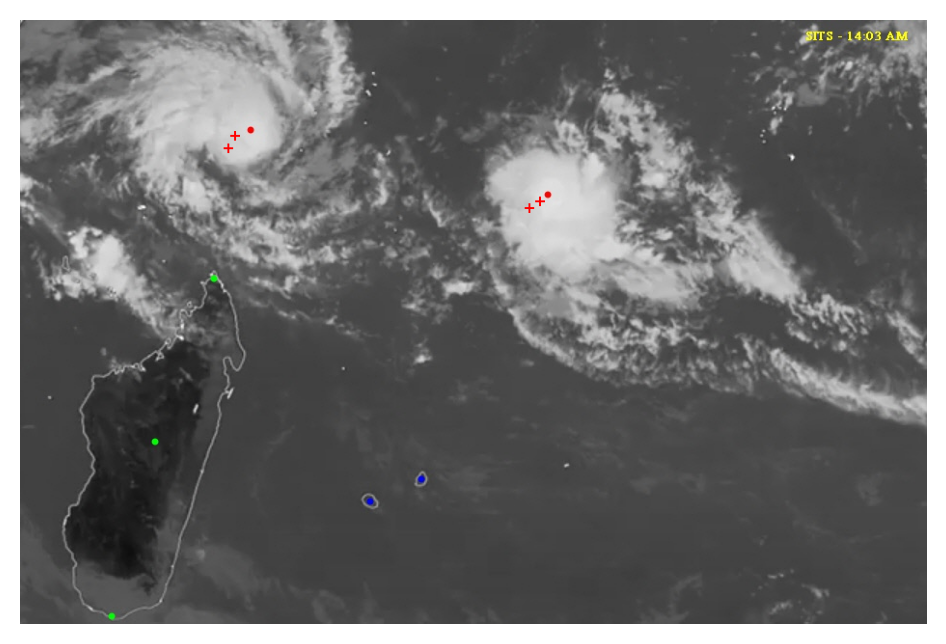

In [17]:
plt.figure( dpi = 200)
plt.imshow(img_plot) 
plt.axis("off") # disable axis
plt.show()

In [18]:
def perp( a ) :
    p = np.zeros(2)
    p[0] = -a[1]
    p[1] = a[0]
    return p

In [19]:
def seg_intersect(a1,a2, b1,b2) :
    da = a2-a1
    db = b2-b1
    dp = a1-b1
    dap = perp(da)
    denom = np.dot( dap, db)
    num = np.dot( dap, dp )
    return (num / denom.astype(float))*db + b1

In [20]:
appo_coord = seg_intersect(coord_A[1, :], coord_A[2, :], coord_B[1, :], coord_B[2, :])

In [21]:
img_plot[int(appo_coord[1])-1 : int(appo_coord[1])+1, int(appo_coord[0])-5 : int(appo_coord[0])+5, :] = [221,160,221]
img_plot[int(appo_coord[1])-5 : int(appo_coord[1])+5, int(appo_coord[0])-1 : int(appo_coord[0])+1, :] = [221,160,221]

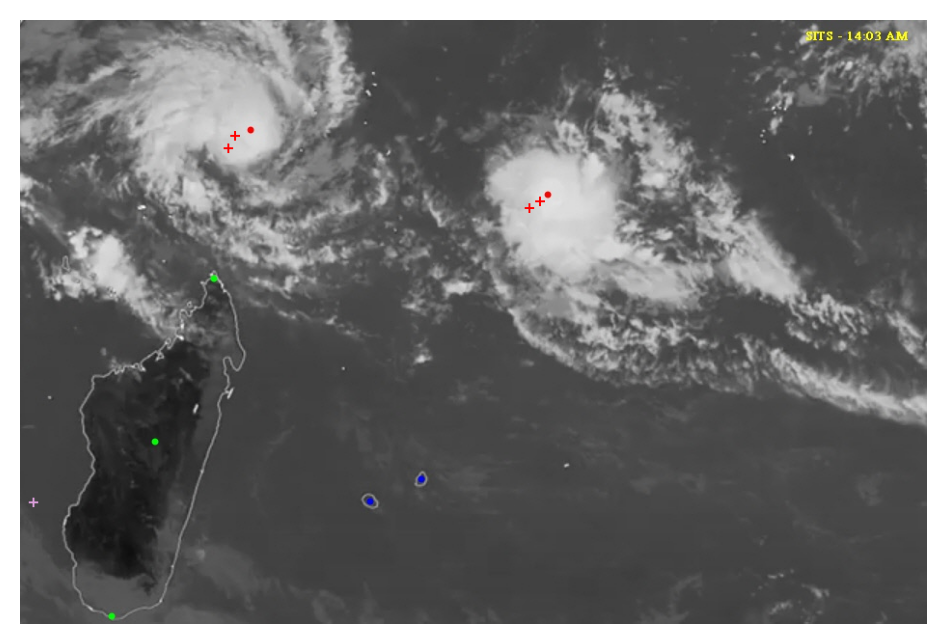

In [22]:
plt.figure( dpi = 200)
plt.imshow(img_plot) 
plt.axis("off") # disable axis
plt.show()

The pink cross corresponds to the apojuncture coordinates

In [23]:
## Distance from the capital

p = np.sqrt((C_x - appo_coord[0])**2 + (C_y-appo_coord[1])**2)
print("Distance of apojuncture from capital city in km: ", pixel_d*p)

Distance of apojuncture from capital city in km:  590.0970385132823


## Estimating collision possibility

In [24]:
speed_A = np.array([(coord_A[1, 0] - coord_A[2, 0])/(time[2] - time[1]), (coord_A[1, 1] - coord_A[2, 1])/(time[2] - time[1])])
speed_B = np.array([(coord_B[1, 0] - coord_B[2, 0])/(time[2] - time[1]), (coord_B[1, 1] - coord_B[2, 1])/(time[2] - time[1])])

In [25]:
t_A_x = (coord_A[2, 0] - appo_coord[0])/speed_A[0]
t_A_y = (coord_A[2, 1] - appo_coord[1])/speed_A[1]
t_A = (t_A_x + t_A_y)/2

t_B_x = (coord_B[2, 0] - appo_coord[0])/speed_B[0]
t_B_y = (coord_B[2, 1] - appo_coord[1])/speed_B[1]
t_B = (t_B_x + t_B_y)/2

In [26]:
print("Time in hours for Belna to reach apojuncture after last image capture: ", t_B/60)
print("Time in hours for Ambali to reach apojuncture after last image capture: ", t_A/60)

Time in hours for Belna to reach apojuncture after last image capture:  26.465352121175606
Time in hours for Ambali to reach apojuncture after last image capture:  43.79842294772002


Therefore, the two cyclones will not collide in reality. Bela will reach the apojuncture point first approximately 24.5 hours since last satelite image capture